# 0.0. IMPORTAÇÕES

In [1]:
import io
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy             as np
import pandas            as pd
import seaborn           as sns
import warnings

from google   import colab as cl
from tabulate import tabulate

warnings.simplefilter('ignore')
sns.set()
pd.set_option('display.max_columns', None) # mostrar todas as colunas do pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x) # remoção da notação cientifica

## 0.1. Carregando os Dados

In [2]:
file_upload = cl.files.upload() # carregando o dataset no drive

Saving kc_house_data.csv to kc_house_data.csv


In [3]:
df_raw = pd.read_csv('kc_house_data.csv')

# 1.0. DESCRIÇÃO DOS DADOS

In [4]:
df1 = df_raw.copy()

## 1.1. Descrição das colunas

**id** - Identificador de cada imóvel vendido;<br>
**date** - Data da realização da venda;<br>
**price** - Preço de cada imóvel vendido;<br>
**bedrooms** - Número de quartos;<br>
**bathrooms** - Número de banheiros, onde 0.5 corresponde a um banheiro sem chuveiro;<br>
**sqft_living** - Medida em pés quadrados da área interna do imóvel;<br>
**sqft_lot** - Medida em pés quadrados da área do terreno;<br>
**floors** - Número de andares;<br>
**waterfront** - O apartamento tem ou não vista para água;<br>
**view** - Um índice de 0 a 4 de quão boa era a vista do imóvel: 0 = Sem vista, 1 = Razoável 2 = Média, 3 = Boa, 4 = Excelente;<br>
**condition** - Um índice de 1 a 5 sobre a condição do apartamento: 1 = Ruim- Desgastado, 2 = Razoável- Mal gasto, 3 = Médio, 4 = Bom, 5= Muito Bom;<br>
**grade** -  Um índice de 1 a 13 do nível de construção e design do imóvel;<br>
**sqft_above** - Medida em pés quadrados do espaço interno do imóvel que está acima do nível do solo;<br>
**sqft_basement** - Medida em pés quadrados do espaço interno do porão do imóvel;<br>
**yr_built** - Ano de construção do imóvel;<br>
**yr_renovated** - Ano da última reforma do imóvel;<br>
**zipcode** - CEP do imóvel;<br>
**lat** - Latitude<br>
**long** - Longitude<br>
**sqft_living15** - Medida em pés quadrados da área interna dos 15 imóveis vizinhos mais próximos;<br>
**sqft_lot15** - Medida em pés quadrados da área do terreno dos 15 imóveis vizinhos mais próximos.

## 1.2. Dimensão dos Dados

In [5]:
print('Quantidade de linhas: {}'.format(df1.shape[0]))
print('Quantidade de colunas: {}'.format(df1.shape[1]))

Quantidade de linhas: 21613
Quantidade de colunas: 21


## 1.3. Tipo dos Dados

In [6]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.4. Checando os dados nulos

In [7]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.6. Conversão dos tipos de dados

In [8]:
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')

## 1.7. Descrição Estatística

In [9]:
num_attributes = df1.select_dtypes(include=['int64', 'float64']);
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1. Atributos Numéricos

In [10]:
# métricas de tendência central
mean = pd.DataFrame(num_attributes.apply(np.mean)).T
median = pd.DataFrame(num_attributes.apply(np.median)).T

# métricas de dispersão
min_ = pd.DataFrame(num_attributes.apply(np.min)).T
max_ = pd.DataFrame(num_attributes.apply(np.max)).T
range = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
std = pd.DataFrame(num_attributes.apply(np.std)).T
skew = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
kurtosis = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# mesclando todas as métricas
m = pd.concat([min_, max_, range, mean, median, std, skew, kurtosis]).T.reset_index()
m.columns = ['features', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,features,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.00,9900000190.00,9899000088.00,4580301520.86,3904930410.00,2876499023.43,0.24,-1.26
1,price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
2,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
3,bathrooms,0.00,8.00,8.00,2.11,2.25,0.77,0.51,1.28
4,sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
5,sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
6,floors,1.00,3.50,2.50,1.49,1.50,0.54,0.62,-0.48
7,waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.39,127.63
8,view,0.00,4.00,4.00,0.23,0.00,0.77,3.40,10.89
9,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.03,0.53


### 1.7.2. Atributos Categóricos

Todas as features são numéricas (int ou float)

# 2.0. FEATURE ENGINEERING

In [11]:
df2 = df1.copy()

## 2.1. Feature Enginnering

In [12]:
# price_per_sqft_living
df2['price_per_sqft_living'] = df2.apply(lambda x: x['price'] / x['sqft_living'], axis=1)

# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# 3.0. FILTRAGEM DAS VARIÁVEIS

In [13]:
df3 = df2.copy()

## 3.1. Filtragem das Linhas

In [14]:
# removendo ids duplicados, mantendo apenas o último registro
df3 = df3.sort_values('date', ascending=False)
df3 = df3.drop_duplicates(subset='id', keep='first')

# removendo casas com bedrooms = 0, pois há grande possibilidade de terem sido preenchidas de forma incorreta
df3 = df3.loc[~(df3['bedrooms'] == 0), :]

# substituindo o bedrooms = 33 por 3, pois provavelmente foi erro de digitação.
df3.loc[(df3['bedrooms'] == 33), 'bedrooms'] = 3

# removendo casas com bathrooms = 0, pois há grande possibilidade de terem sido preenchidas de forma incorreta
df3 = df3.loc[~(df3['bathrooms'] == 0), :]

## 3.2. Filtragem das Colunas

In [15]:
# Não removeremos nenhuma coluna nesse primeiro ciclo.

# 4.0. ANÁLISE EXPLORATÓRIA DOS DADOS

In [16]:
df4 = df3.copy()

## 4.1. Análise Univariada

### 4.1.1. Variável Resposta

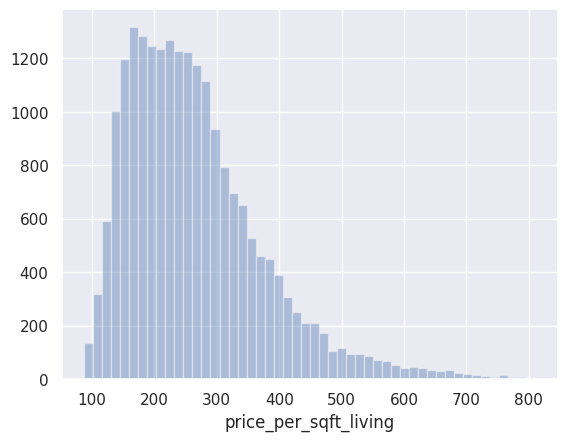

In [17]:
sns.distplot(df4['price_per_sqft_living'], kde=False);

### 4.1.2. Variáveis Numéricas

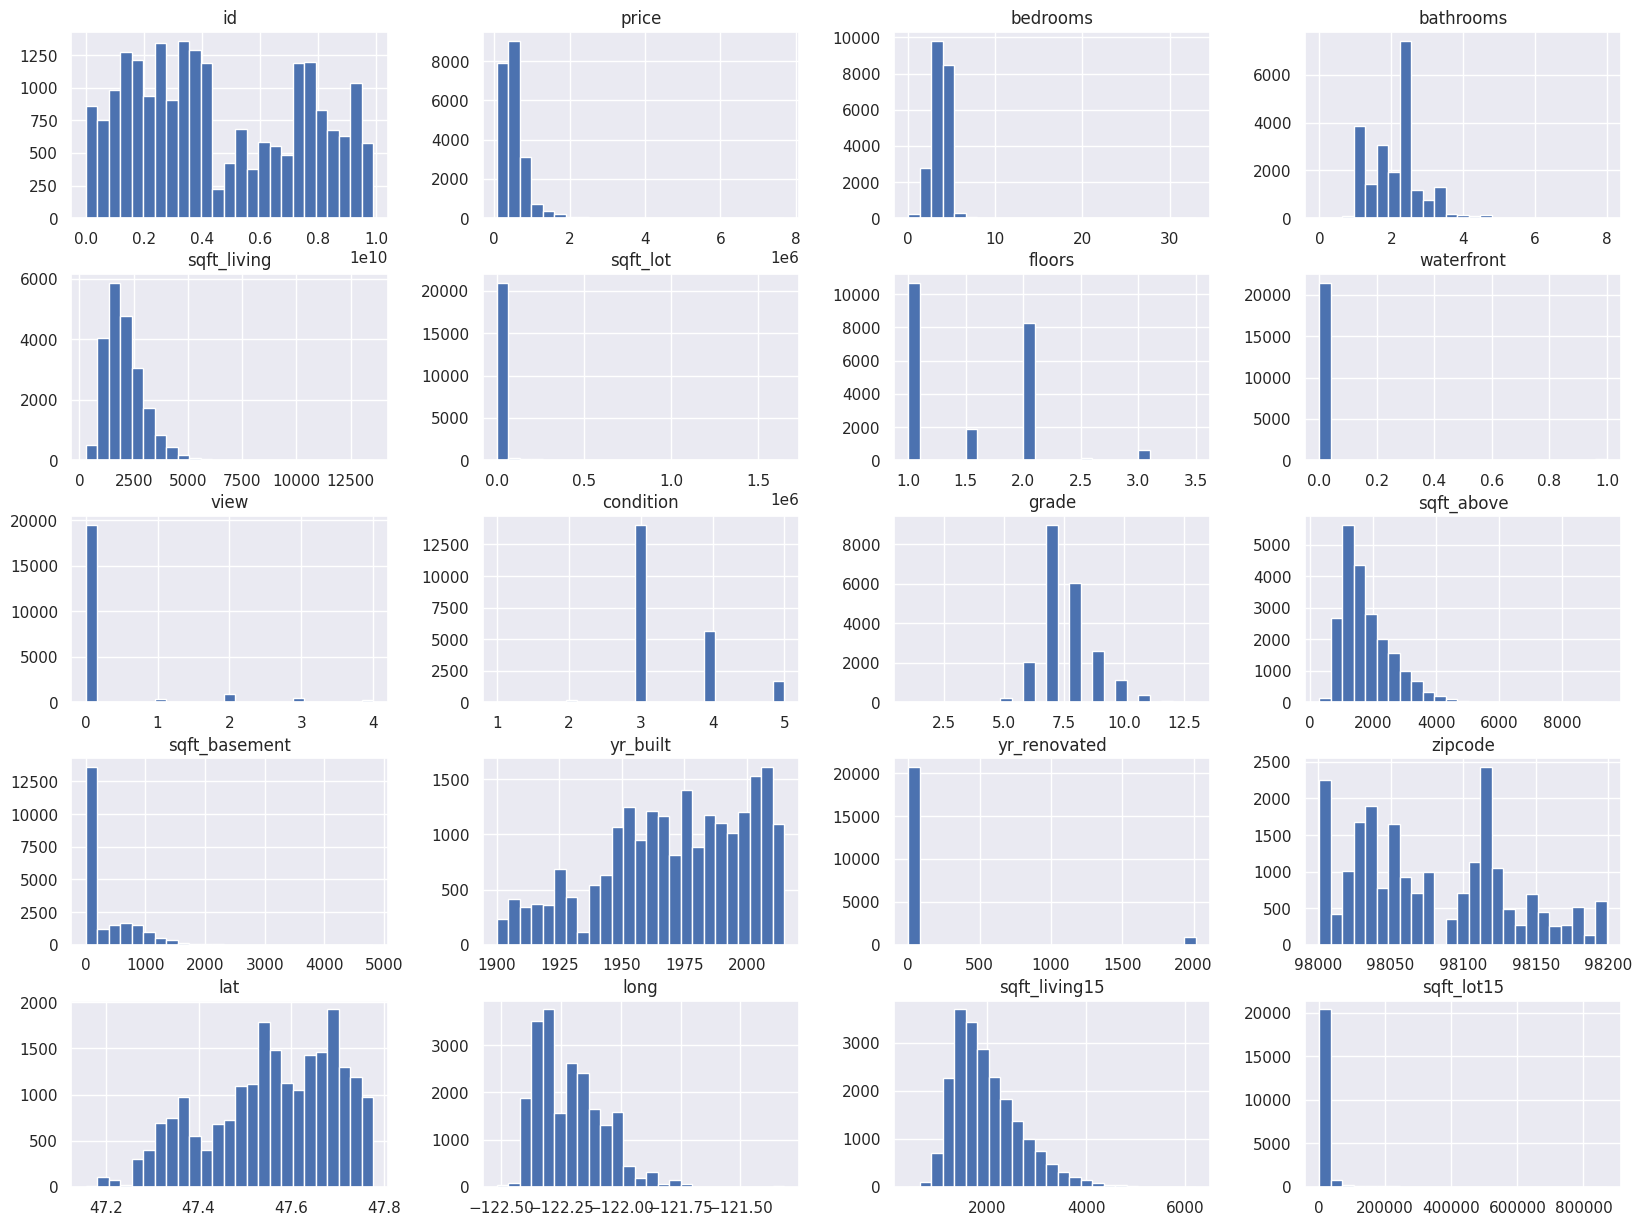

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(20, 15))
num_attributes.hist(bins=25, ax=axs);

## 4.2. Análise Bivariada

### 4.2.1. Criação das Hipóteses

H01. Imóveis que possuem vista para água são mais caros na média.<br>
H02. Imóveis com data de construção menor que 1955 são mais baratos na média.<br>
H03. Imóveis com porão custam mais, na média, do que os imóveis sem porão.<br>
H04. Há um crescimento do preço dos imóveis YoY, na média.<br>
H05. Imóveis com 3 banheiros tem um crescimento de MoM, na média.<br>
H06. O valor do imóvel varia até 40% dependendo do zipcode.<br>
H07. Imóveis com condições muito boas (5) podem valer mais de 50%, na média, do que os com condição média (3).<br>
H08. O valor do imóvel sobe 5%, na média, a cada nível de melhoria na construção e desing (grade). <br>
H09. Imóveis com alguma vista são 30% mais caros, na média, do que os imóveis sem vista.<br>
H10. O valor do imóvel aumenta 10%, na média, para cada banheiro completo que possui.

### 4.2.2. Verificação das Hipóteses

##### H01. Imóveis que possuem vista para água são mais caros na média.
**Verdadeiro**. Verificamos que a área quadrada de imóveis com vista para o mar são 93.33% mais caros na média.

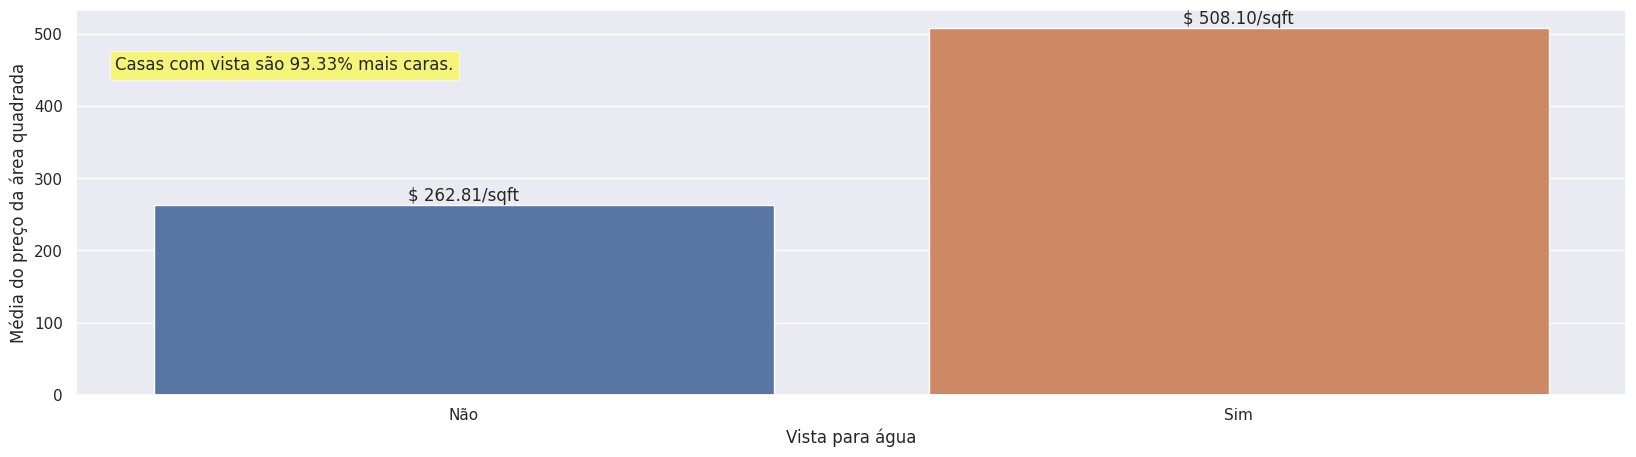

In [19]:
# contando quantas casas têm vista para água e quantas não têm
aux1 = df4[['waterfront', 'price_per_sqft_living']].groupby('waterfront').mean().reset_index().rename(columns={'price_per_sqft_living': 'mean_price_per_sqft_lot_per_house'})

# mudando os valores do waterfront
aux1['waterfront'] = aux1['waterfront'].apply(lambda x: 'Não' if x == 0 else 'Sim')

# criando gráfico
fig, axs = plt.subplots(figsize=(20, 5))

sns.barplot(x='waterfront', y='mean_price_per_sqft_lot_per_house', data=aux1, ax=axs);

for i, value in aux1['waterfront'].iteritems():
  axs.text(aux1.index[i], aux1['mean_price_per_sqft_lot_per_house'][i], '$ {:.2f}/sqft'.format(aux1['mean_price_per_sqft_lot_per_house'][i]), ha='center', va='bottom');

axs.set_xlabel('Vista para água');
axs.set_ylabel('Média do preço da área quadrada');

dif_mean = round((aux1['mean_price_per_sqft_lot_per_house'][1] / aux1['mean_price_per_sqft_lot_per_house'][0] - 1) * 100, 2)

plt.text(x=-0.45, y=450, s='Casas com vista são {:.2f}% mais caras.'.format(dif_mean), bbox=dict(facecolor='yellow', alpha=0.5));

##### H02. Imóveis com data de construção menor que 1955 são mais baratos na média.
**Falso**. É possível ver no gráfico que os imóveis construídos antes de 1955 têm o preço médio da área quadrada maior do que os construídos posteriormente.

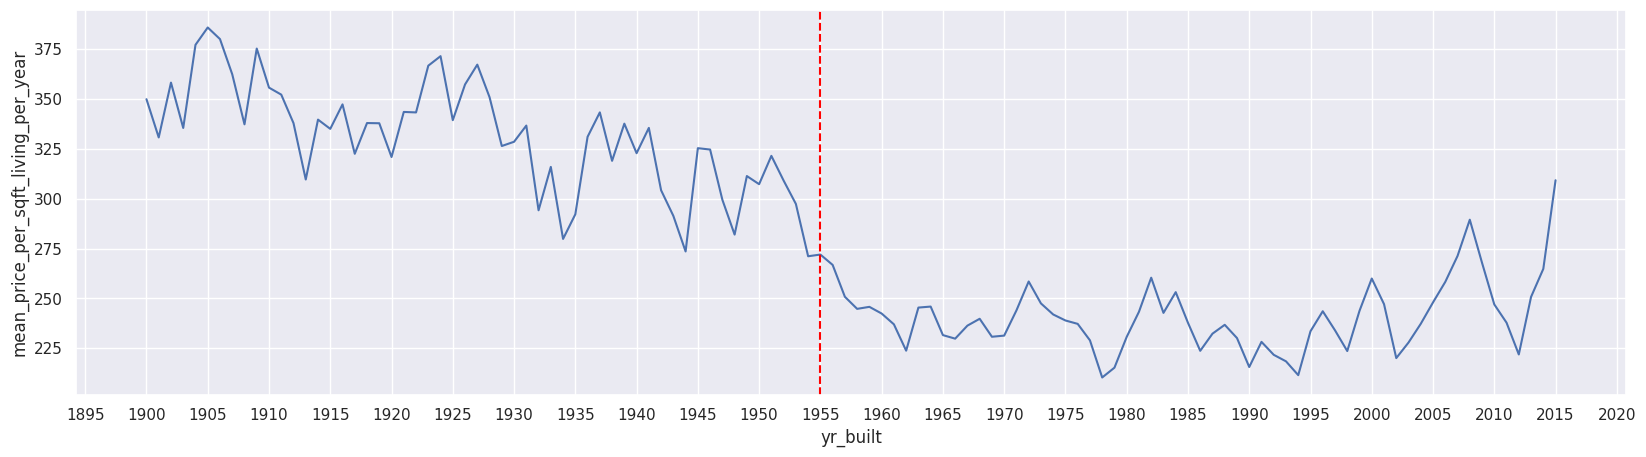

In [20]:
aux1 = df4[['yr_built', 'price_per_sqft_living']].groupby('yr_built').mean().reset_index().rename(columns={'price_per_sqft_living': 'mean_price_per_sqft_living_per_year'})

fig, axs = plt.subplots(figsize=(20, 5))

h2 = sns.lineplot(data=aux1, x='yr_built', y='mean_price_per_sqft_living_per_year', ax=axs);

h2.xaxis.set_major_locator(ticker.MultipleLocator(5));

graf_h2 = h2.get_figure()

plt.axvline(x=1955, color='red', linestyle='--');

##### H03. Imóveis com porão custam mais, na média, do que os imóveis sem porão.
**Verdadeiro**. Mas a diferença é mínima, conforme observado no gráfico.

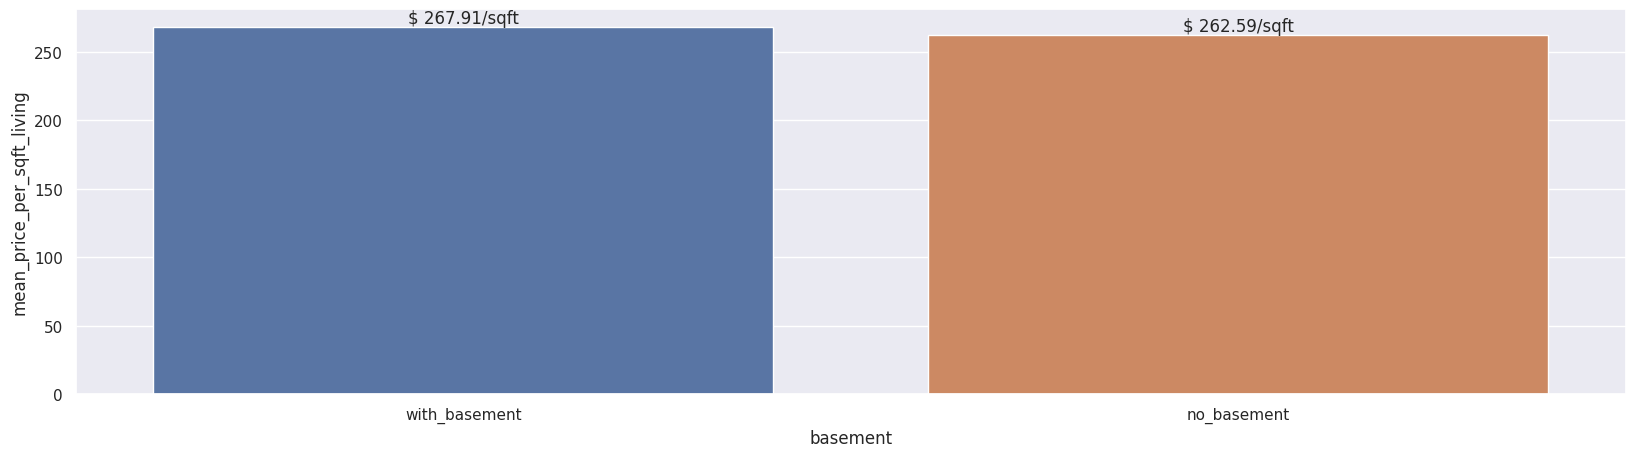

In [21]:
with_basement = df4[~(df4['sqft_basement'] == 0)]
no_basement = df4[df4['sqft_basement'] == 0]

aux1 = pd.DataFrame(columns=['basement', 'mean_price_per_sqft_living'])
aux1.loc[0] = ['with_basement',
               with_basement['price_per_sqft_living'].mean()]
aux1.loc[1] = ['no_basement',
               no_basement['price_per_sqft_living'].mean()]

fig, axs = plt.subplots(figsize=(20, 5))

sns.barplot(x='basement', y='mean_price_per_sqft_living', data=aux1, ax=axs);

for i, value in aux1['basement'].iteritems():
  axs.text(aux1.index[i], aux1['mean_price_per_sqft_living'][i], '$ {:.2f}/sqft'.format(aux1['mean_price_per_sqft_living'][i]), ha='center', va='bottom');

##### H04. Há um crescimento do preço dos imóveis YoY, na média.
**Falso**. Conforme observamos no gráfico da Hipótese 02.

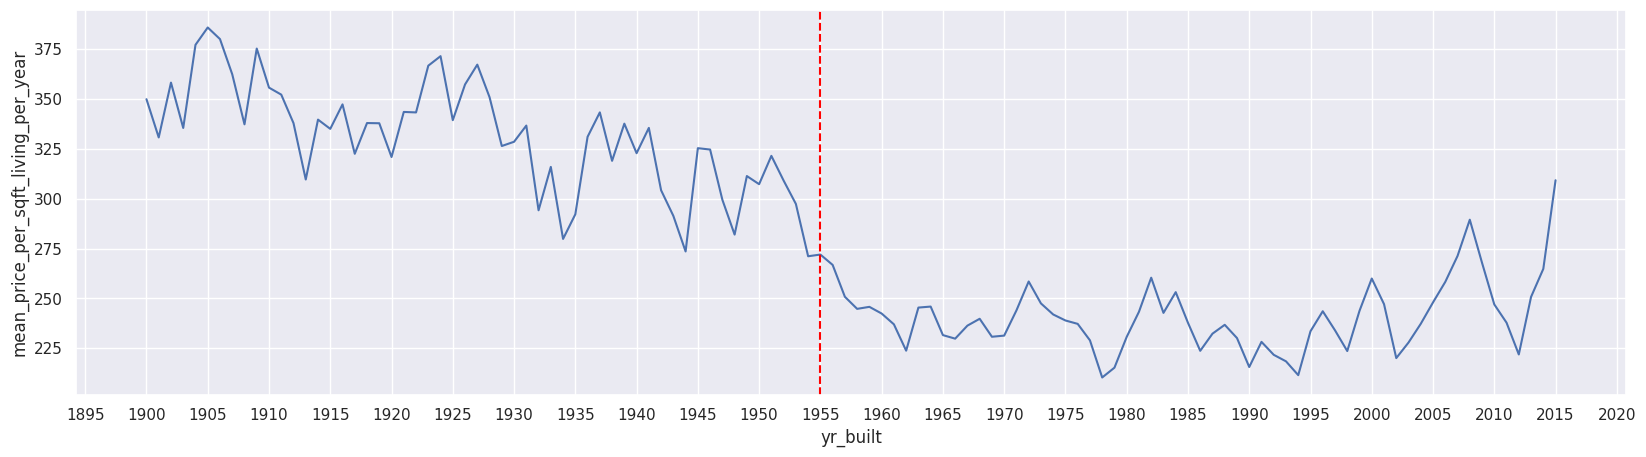

In [22]:
graf_h2

##### H05. Imóveis com 3 banheiros tem um crescimento de MoM, na média.
**Falso**. Não há um aumento constante com o passar dos meses para o preço médio da área quadrada dos imóveis com 03 banheiros.<br>
Porém, observamos um aumento no preço médio da área quadrada no mês de Maio, único mês com dados de 2014 e 2015. Seria necessário aguardar mais meses para ver se há um aumento nos preços YoY.

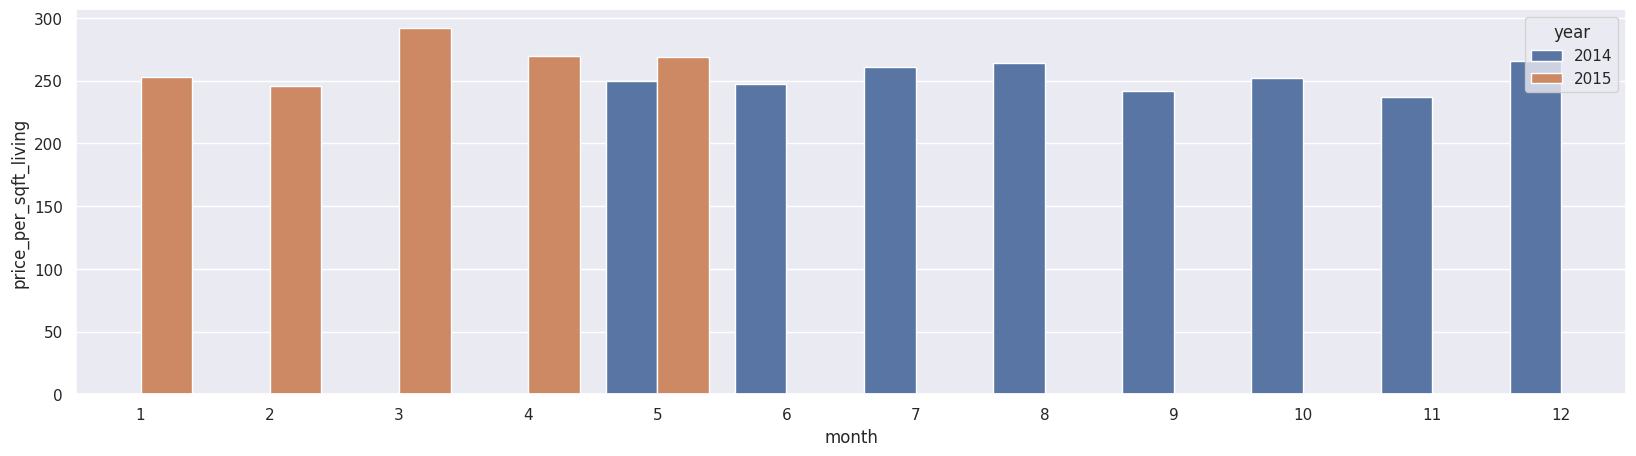

In [23]:
aux1 = df4[df4['bathrooms'] == 3]

aux2 = aux1[['year', 'month', 'price_per_sqft_living']].groupby(['year', 'month']).mean().reset_index()

fig, axs = plt.subplots(figsize=(20, 5))

sns.barplot(x='month', y='price_per_sqft_living', hue='year', data=aux2, ax=axs);

##### H06. O valor do imóvel varia mais de 40% dependendo do zipcode.
**Verdadeiro**. A diferença entre os preços médios por área quadrada do zipcode mais barato com o mais caro chega a 278.35%.<br>

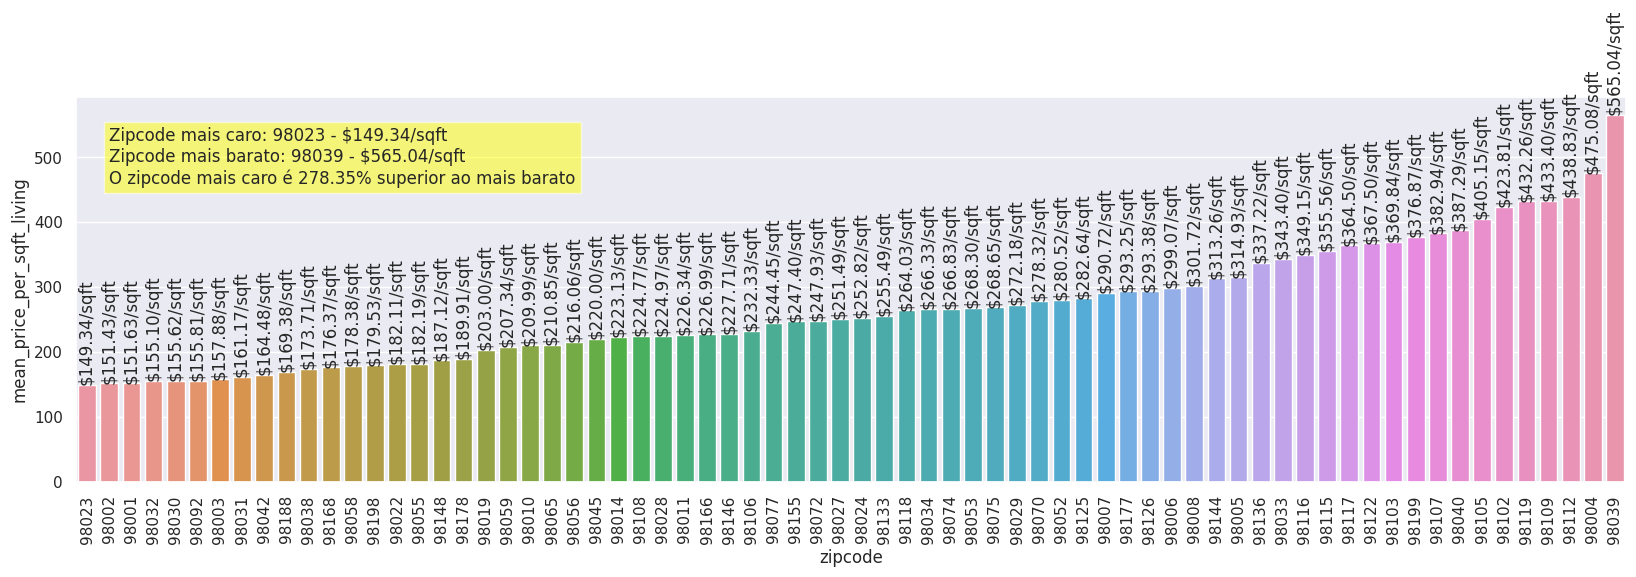

In [24]:
aux1 = df4[['zipcode', 'price_per_sqft_living']].groupby('zipcode').mean().reset_index().rename(columns={'price_per_sqft_living': 'mean_price_per_sqft_living'})
aux1 = aux1.sort_values('mean_price_per_sqft_living').reset_index(drop=True)

fig, axs = plt.subplots(figsize=(20, 5))

sns.barplot(x='zipcode', y='mean_price_per_sqft_living', order=aux1['zipcode'], data=aux1, ax=axs);

for i, value in aux1['zipcode'].iteritems():    
  axs.text(aux1.index[i], aux1['mean_price_per_sqft_living'][i], '${:.2f}/sqft'.format(aux1['mean_price_per_sqft_living'][i]), ha='center', va='bottom', rotation=90);

axs.set_xticklabels(aux1['zipcode'], rotation=90);

dif_zipcode = ((aux1['mean_price_per_sqft_living'].max() - aux1['mean_price_per_sqft_living'].min()) / aux1['mean_price_per_sqft_living'].min()) * 100
plt.text(x=1, y=460, 
         s='Zipcode mais caro: {} - ${:.2f}/sqft\n\
Zipcode mais barato: {} - ${:.2f}/sqft\n\
O zipcode mais caro é {:.2f}% superior ao mais barato'.format(
    aux1[aux1['mean_price_per_sqft_living'] == aux1['mean_price_per_sqft_living'].min()]['zipcode'].iloc[0],
    aux1['mean_price_per_sqft_living'].min(),
    aux1[aux1['mean_price_per_sqft_living'] == aux1['mean_price_per_sqft_living'].max()]['zipcode'].iloc[0],
    aux1['mean_price_per_sqft_living'].max(),
    dif_zipcode), bbox=dict(facecolor='yellow', alpha=0.5));

##### H07. Imóveis com condições muito boas (5) podem valer mais de 50%, na média, do que os com condição média (3).
**Falso**. Verificamos uma diferença de apenas 16.13% no valor médio da área quadrada, quando comparados imóveis em condições muito boas (\$ 299,59/sqft) e imóveis em boas condições (\$ 257.97/sqft).<br>
Algo que nos chama a atenção é o fato do valor médio da área quadrada de imóveis em condições ruins serem maiores do que de imóveis em boas condições. Seria interessante analisar o motivo dessa diferença. Talvez começando pela localização dos imóveis.

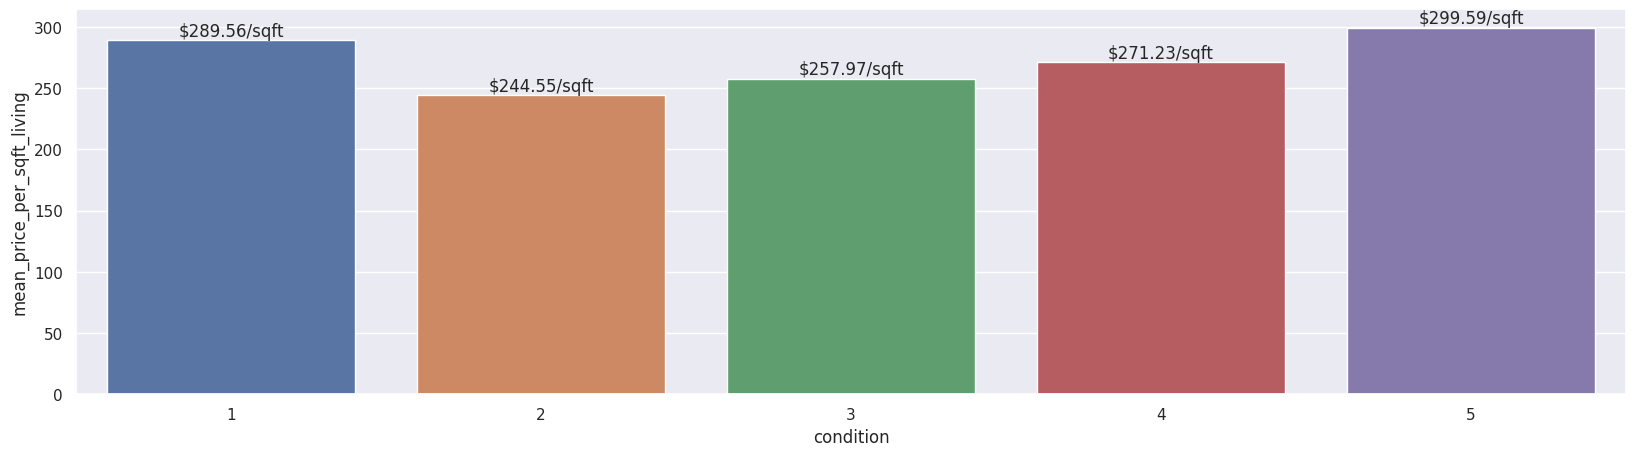

In [25]:
aux1 = df4[['condition', 'price_per_sqft_living']].groupby('condition').mean().reset_index().rename(columns={'price_per_sqft_living': 'mean_price_per_sqft_living'})

fig, axs = plt.subplots(figsize=(20, 5))

sns.barplot(x='condition', y='mean_price_per_sqft_living', data=aux1, ax=axs);

for i, value in aux1['condition'].iteritems():
  axs.text(aux1.index[i], aux1['mean_price_per_sqft_living'][i], '${:.2f}/sqft'.format(aux1['mean_price_per_sqft_living'][i]), ha='center', va='bottom');

##### H08. O valor do imóvel sobe 5%, na média, a cada nível de melhoria na construção e desing (grade).
**Falso**. Conforme verificamos no gráfico, houve uma variação em 'U' dos valores médios das áreas quadradas com o aumento do grau (grade).<br>
É um fenômeno inesperado, pois verificamos que o valor do grau = 3 é superior ao grau mais alto.<br>
Um próximo passo seria investigar para saber se não se trata de outliers.

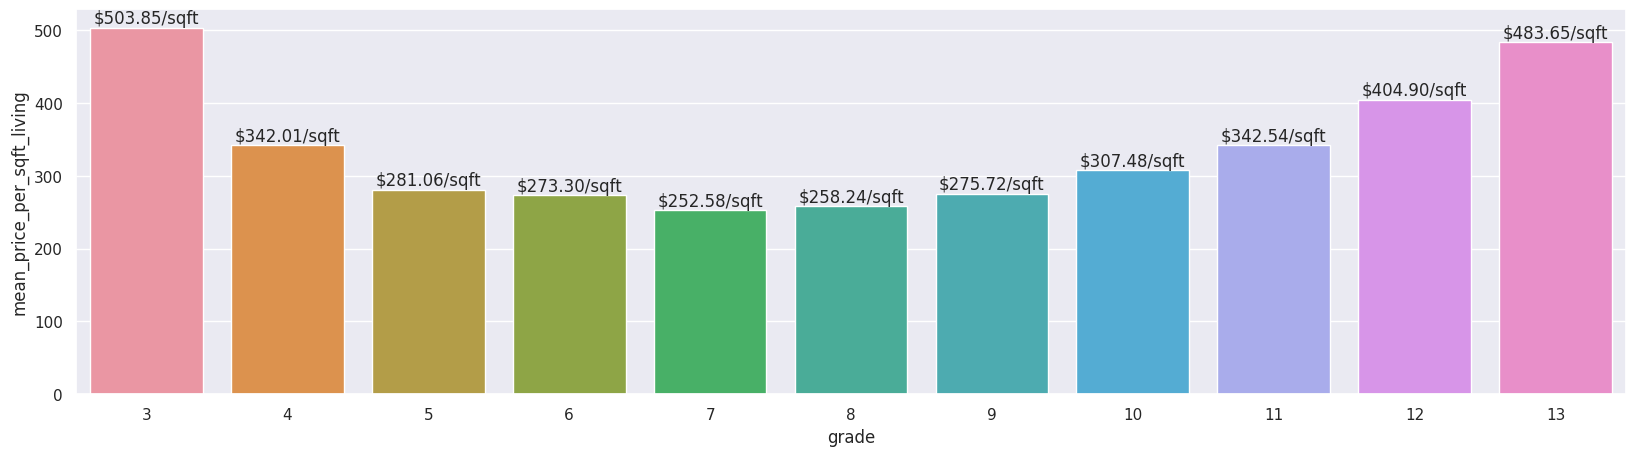

In [26]:
aux1 = df4[['grade', 'price_per_sqft_living']].groupby('grade').mean().reset_index().rename(columns={'price_per_sqft_living': 'mean_price_per_sqft_living'})

fig, axs = plt.subplots(figsize=(20, 5))

sns.barplot(x='grade', y='mean_price_per_sqft_living', data=aux1, ax=axs);

for i, value in aux1['grade'].iteritems():
  axs.text(aux1.index[i], aux1['mean_price_per_sqft_living'][i], '${:.2f}/sqft'.format(aux1['mean_price_per_sqft_living'][i]), ha='center', va='bottom');

##### H09. Imóveis com alguma vista são 30% mais caros, na média, do que os imóveis sem vista.
**Falso**. A diferença de preço médio entre imóveis sem vista (\$ 257.44/sqft) e o menor preço médio dos imóveis com alguma vista (\$ 304.46/sqft) é de 18.26%.<br>
Podemos verificar também que a diferença entre a vista 4 e 3 é de 34.82%. O que mostra ser uma variação bastante significativa. Podendo ser levantando mais detalhes sobre o que motiva um imóvel ter sua avaliação de view = 4.

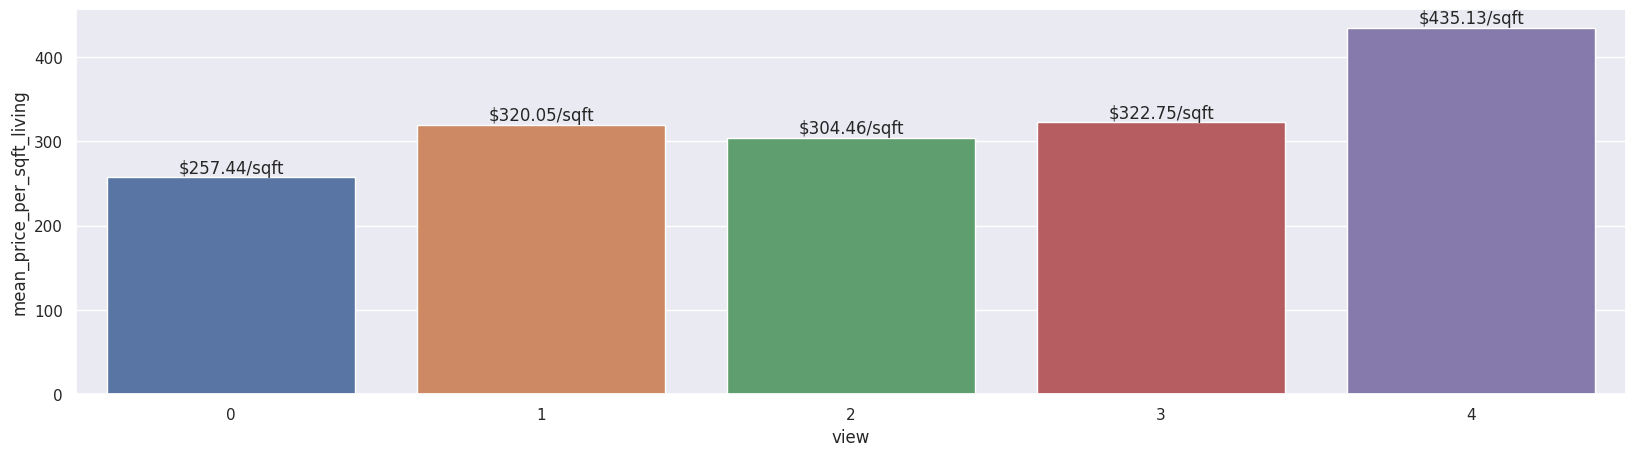

In [27]:
no_view = df4[df4['view'] == 0]
aux1_no_view = no_view[['view', 'price_per_sqft_living']].groupby('view').mean().reset_index().rename(columns={'price_per_sqft_living': 'mean_price_per_sqft_living'})

with_view = df4[df4['view'] != 0]
aux1_with_view = with_view[['view', 'price_per_sqft_living']].groupby('view').mean().reset_index().rename(columns={'price_per_sqft_living': 'mean_price_per_sqft_living'})

aux2 = pd.concat([aux1_no_view, aux1_with_view]).reset_index(drop=True)

fig, axs = plt.subplots(figsize=(20, 5))

sns.barplot(x='view', y='mean_price_per_sqft_living', data=aux2, ax=axs);

for i, value in aux2['view'].iteritems():
  axs.text(aux2.index[i], aux2['mean_price_per_sqft_living'][i], '${:.2f}/sqft'.format(aux2['mean_price_per_sqft_living'][i]), ha='center', va='bottom');

##### H10. O valor do imóvel aumenta 10%, na média, para cada banheiro completo que possui.
**Falso**. Observamos uma queda inicial, o que mostra que a quantidade de banheiros pode não afetar tanto no preço do imóvel.

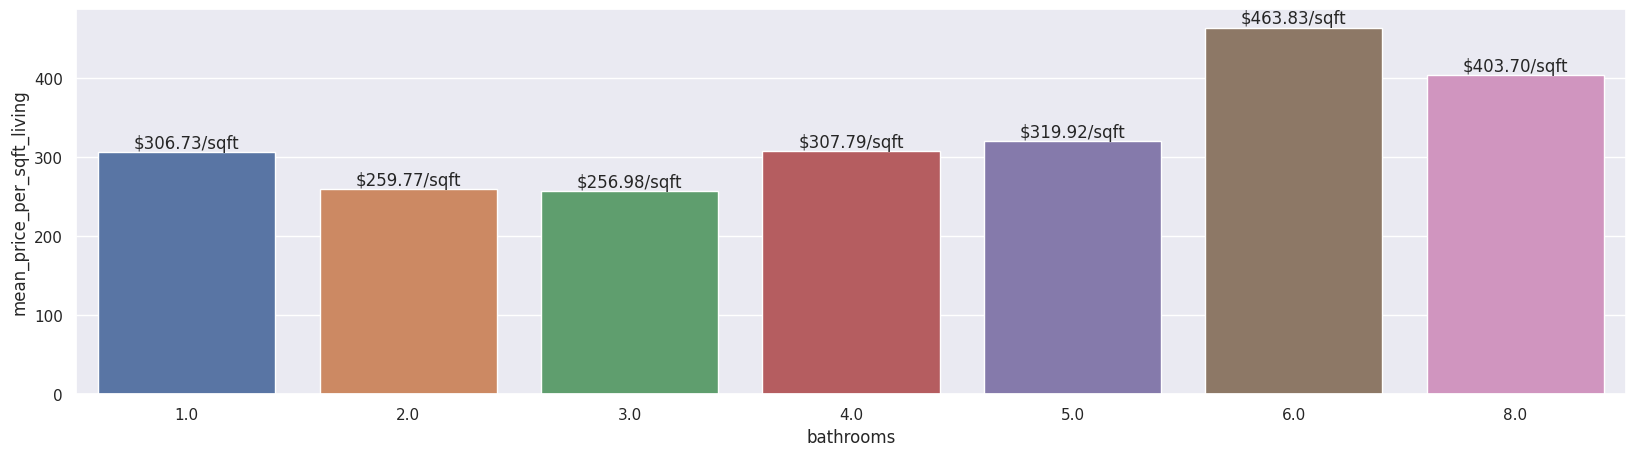

In [28]:
aux1 = df4[['bathrooms', 'price_per_sqft_living']].groupby('bathrooms').mean().reset_index().rename(columns={'price_per_sqft_living': 'mean_price_per_sqft_living'})

# selecionando apenas bathrooms inteiros
aux2 = aux1.query('bathrooms % 1 == 0').reset_index(drop=True)

fig, axs = plt.subplots(figsize=(20, 5))

sns.barplot(x='bathrooms', y='mean_price_per_sqft_living', data=aux2, ax=axs);

for i, value in aux2['bathrooms'].iteritems():
  axs.text(aux2.index[i], aux2['mean_price_per_sqft_living'][i], '${:.2f}/sqft'.format(aux2['mean_price_per_sqft_living'][i]), ha='center', va='bottom');

##### Resumo das Hipóteses


In [29]:
tab = [['Hipóteses', 'Conclusão', 'Relevância'], 
       ['H1', 'Verdadeira', 'Alta'],
       ['H2', 'Falsa', 'Baixa'], 
       ['H3', 'Verdadeira', 'Baixa'],
       ['H4', 'Falsa', 'Baixa'], 
       ['H5', 'Falsa', 'Baixa'], 
       ['H6', 'Verdadeira', 'Alta'],
       ['H7', 'Falsa', 'Baixa'],
       ['H8', 'Falsa', 'Baixa'],
       ['H9', 'Falsa', 'Baixa'], 
       ['H10', 'Falsa', 'Baixa']]

print(tabulate(tab, headers='firstrow'))

Hipóteses    Conclusão    Relevância
-----------  -----------  ------------
H1           Verdadeira   Alta
H2           Falsa        Baixa
H3           Verdadeira   Baixa
H4           Falsa        Baixa
H5           Falsa        Baixa
H6           Verdadeira   Alta
H7           Falsa        Baixa
H8           Falsa        Baixa
H9           Falsa        Baixa
H10          Falsa        Baixa


## 4.3. Análise Multivariada

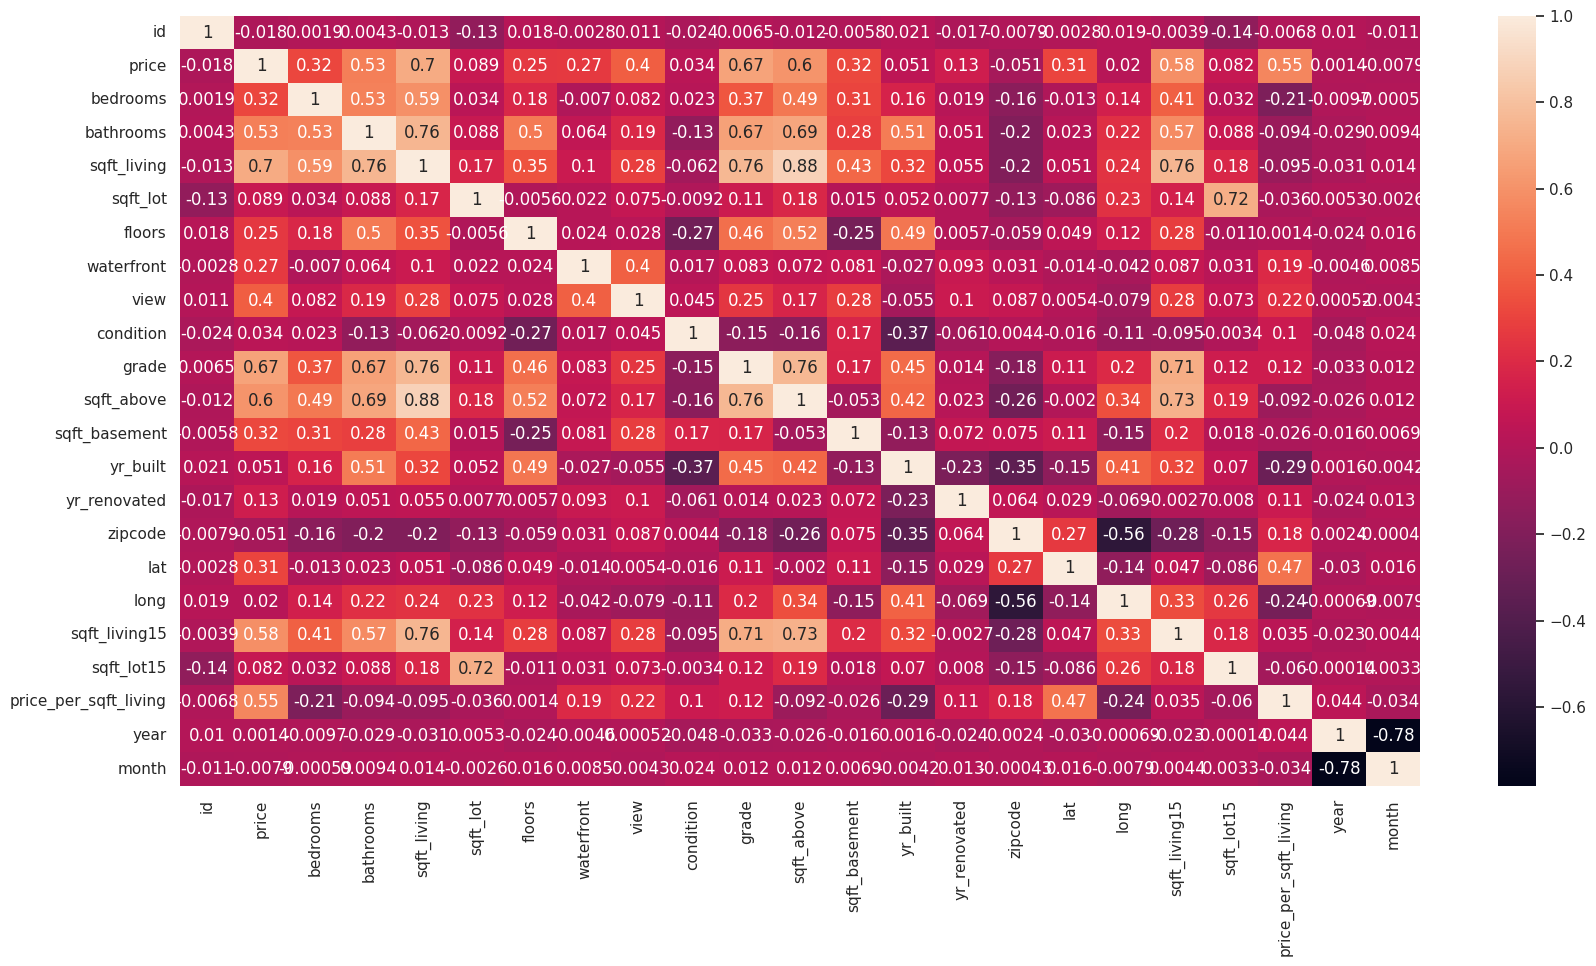

In [30]:
fig, axs = plt.subplots(figsize=(20, 10))

correlation = df4.corr(method='pearson')
sns.heatmap(correlation, annot=True, ax=axs);

# 5.0. RESOLVENDO AS QUESTÕES DE NEGÓCIO

In [31]:
df5 = df4.copy()

## Q1. Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

In [32]:
# agrupar os dados por região
aux1 = df5[['zipcode', 'price_per_sqft_living']].groupby('zipcode').median().reset_index().rename(columns={'price_per_sqft_living': 'median_price_per_zipcode'})

# unindo informações sobre os imóveis com as medianas dos preços de cada região
aux2 = pd.merge(df5, aux1, how='left', on='zipcode')

# Preenchendo como 'Compra' caso o preço médio da área quadrada esteja menor do que o preço mediano da região do imóvel e a condição seja boa ou melhor
aux2['status'] = aux2.apply(lambda x: 'Compra' if (x['price_per_sqft_living'] < x['median_price_per_zipcode']) &
                                                (x['condition'] > 3) else 'Não Compra', axis=1)

aux2['median_total_price'] = aux2.apply(lambda x: x['sqft_living'] * x['median_price_per_zipcode'], axis=1)

In [33]:
aux2[['id', 'zipcode', 'price', 'median_total_price', 'condition', 'status']].sample(5)

,id,zipcode,price,median_total_price,condition,status
2040,7844200120,98188,340000.00,498300.00,3,Não Compra
9667,1624059219,98006,850000.00,761611.00,5,Não Compra
11385,6632300477,98125,324950.00,276038.38,3,Não Compra
392,322069109,98038,411000.00,326443.25,4,Não Compra
306,726049202,98133,335000.00,250784.84,4,Não Compra


## Q2. Uma vez o imóvel comprado, qual o melhor momento para vendê-lo e por qual preço?

In [34]:
# adicionando as estações do ano
seasons_year_eua = {1: 'winter', 2: 'winter', 3:'spring', 4:'spring', 5:'spring', 6:'summer', 7:'summer', 8:'summer',
                    9:'fall', 10:'fall', 11:'fall', 12:'winter'}
df5['seasons_year'] = df5['month'].map(seasons_year_eua)

# agrupando os dados por região e sazonalidade
aux1 = df5[['zipcode', 'seasons_year', 'price_per_sqft_living']].groupby(['zipcode', 'seasons_year']).median().reset_index().rename(columns={'price_per_sqft_living': 'median_price_per_zipcode_season'})
aux2 = pd.merge(df5, aux1, on=['zipcode', 'seasons_year'])

# valor total do imóvel pela mediana
aux2['median_total_price'] = aux2.apply(lambda x: x['sqft_living'] * x['median_price_per_zipcode_season'], axis=1)

# calculando valor de venda
aux2['sale_price'] = aux2.apply(lambda x: x['price'] * 1.3 if x['price_per_sqft_living'] <= x['median_price_per_zipcode_season'] else
                                          x['price'] * 1.1, axis=1 )

# calculando o lucro
aux2['profit'] = aux2.apply(lambda x: x['sale_price'] - x['price'], axis=1)

In [35]:
aux2[['id', 'zipcode', 'seasons_year', 'price', 'median_total_price', 'sale_price', 'profit']].sample(5)

,id,zipcode,seasons_year,price,median_total_price,sale_price,profit
10164,2224079001,98024,winter,625700.00,601106.44,688270.00,62570.00
12335,3438500253,98106,fall,616950.00,747742.94,802035.00,185085.00
18700,922059020,98031,summer,242025.00,214638.04,266227.50,24202.50
13133,5430300120,98115,fall,1100000.00,1397526.10,1430000.00,330000.00
20770,2330000035,98005,summer,710000.00,530543.48,781000.00,71000.00
